<a href="https://colab.research.google.com/github/ariel-hedvat/AdvancedMLDLCourseAssignments/blob/main/Experiments/experiments_on_3_users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will be used in order to perform and work with limited data (of 3 users) in order to "run fast" the work on the data, EDA, pre-processing and even models so that it will benefit us later.

Import Libraries


In [36]:
# imports
import os
import zipfile
import pandas as pd
from sklearn.model_selection import train_test_split
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Loading the data

In [2]:
# Function to unzip the dataset
def unzip_dataset(zip_file_url):
    response = requests.get(zip_file_url)
    with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
        extracted_files = {}
        for file in zip_ref.namelist():
          if file.endswith('.csv'):
                extracted_files[file] = pd.read_csv(io.BytesIO(zip_ref.read(file)), encoding='utf-8')
    return extracted_files

# The cols here: user_id, artistname, trackname, playlistname

In [3]:
# Data Loading for the csv info
zip_file_url = 'https://github.com/ariel-hedvat/AdvancedMLDLCourseAssignments/raw/main/Experiments/Data/DataFor3Users/three_users_data.zip'
three_users_data = unzip_dataset(zip_file_url)
three_users_data_df = pd.concat(three_users_data.values(), ignore_index=True)

In [4]:
three_users_data_df

,user_id,artistname,trackname,playlistname
0,435faeede7f140d0ab8b4f7765558ecf,Terry Malts,Can't Tell No One,AMPpod 12
1,435faeede7f140d0ab8b4f7765558ecf,The Soft Moon,Die Life,AMPpod 12
2,435faeede7f140d0ab8b4f7765558ecf,Queens Of The Stone Age,First It Giveth,AMPpod 12
3,435faeede7f140d0ab8b4f7765558ecf,Julia Holter,In the Same Room,AMPpod 12
4,435faeede7f140d0ab8b4f7765558ecf,Crystal Castles,Kerosene,AMPpod 12
...,...,...,...,...
529,eecb23cd4578482fdd624fd2360256a1,Foo Fighters,The Pretender,Starred
530,eecb23cd4578482fdd624fd2360256a1,Foo Fighters,This Is A Call,Starred
531,eecb23cd4578482fdd624fd2360256a1,Foo Fighters,Times Like These,Starred
532,eecb23cd4578482fdd624fd2360256a1,Foo Fighters,Wheels,Starred


In [5]:
# Data Loading for the csv info with spotify-api
extended_url = 'https://github.com/ariel-hedvat/AdvancedMLDLCourseAssignments/raw/main/Experiments/Data/DataFor3Users/extended_tracks_metadata_for_3_users.csv'
extended_tracks_metadata_for_3_users = pd.read_csv(extended_url)

In [6]:
extended_tracks_metadata_for_3_users

,Track Name,Artist Name,Acousticness,Danceability,Energy,Instrumentalness,Speechiness,Liveness,Loudness,Tempo,Valence,Popularity,Release Date,Genres
0,Can't Tell No One,Terry Malts,0.000723,0.436,0.939,0.531000,0.0417,0.0613,-3.372,105.150,0.5180,5,2/21/2012,"['garage pop', 'la indie']"
1,Die Life,The Soft Moon,0.000303,0.577,0.987,0.948000,0.0789,0.3270,-5.144,155.000,0.3260,21,10/30/2012,"['dark post-punk', 'grave wave', 'nu gaze']"
2,First It Giveth,Queens Of The Stone Age,0.021100,0.448,0.966,0.059500,0.1010,0.1350,-4.029,107.293,0.3800,56,2002,"['alternative metal', 'alternative rock', 'gru..."
3,In the Same Room,Julia Holter,0.425000,0.460,0.327,0.061200,0.0287,0.0886,-10.309,109.253,0.1080,25,10/26/2012,"['art pop', 'chamber pop', 'electra', 'experim..."
4,Kerosene,Crystal Castles,0.082700,0.519,0.546,0.000000,0.0763,0.1330,-9.368,115.799,0.0862,67,1/1/2012,"['alternative dance', 'bitpop', 'digital hardc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,The Pretender,Foo Fighters,0.000917,0.433,0.959,0.000000,0.0431,0.0280,-4.040,172.984,0.3650,80,9/25/2007,"['alternative metal', 'alternative rock', 'mod..."
484,This Is A Call,Foo Fighters,0.001410,0.261,0.964,0.000029,0.0638,0.1830,-6.654,162.902,0.3260,62,7/4/1995,"['alternative metal', 'alternative rock', 'mod..."
485,Times Like These,Foo Fighters,0.000014,0.376,0.908,0.000014,0.0879,0.2410,-3.793,144.581,0.2660,70,10/22/2002,"['alternative metal', 'alternative rock', 'mod..."
486,Wheels,Foo Fighters,0.000495,0.426,0.792,0.000005,0.0374,0.1420,-4.709,161.994,0.5570,63,11/3/2009,"['alternative metal', 'alternative rock', 'mod..."


EDA

In [7]:
# EDA
three_users_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       534 non-null    object
 1   artistname    534 non-null    object
 2   trackname     534 non-null    object
 3   playlistname  534 non-null    object
dtypes: object(4)
memory usage: 16.8+ KB


In [9]:
#Statistics
three_users_data_df.describe()

,user_id,artistname,trackname,playlistname
count,534,534,534,534
unique,3,336,525,36
top,435faeede7f140d0ab8b4f7765558ecf,Foo Fighters,Islands,Starred
freq,470,19,2,148


In [10]:
#Unique Values
three_users_data_df.nunique()

user_id           3
artistname      336
trackname       525
playlistname     36
dtype: int64

In [13]:
#Top Artists and Tracks (finding the most popular artists and tracks in the dataset)
#artist name :
three_users_data_df['artistname'].value_counts()

Foo Fighters       19
Slayer             16
LV                 15
alt-J              14
Foals              13
                   ..
Wye Oak             1
Eric B. & Rakim     1
Psychic Ills        1
Pharmakon MTL       1
Remy Zero           1
Name: artistname, Length: 336, dtype: int64

In [14]:
#track name
three_users_data_df['trackname'].value_counts()

Islands                          2
Late Night                       2
Wait/Awake                       2
Thaw                             2
Owl                              2
                                ..
All Day Sucker                   1
The Hollows                      1
Swim and Sleep [Like a Shark]    1
Shallow Tears                    1
Word Forward                     1
Name: trackname, Length: 525, dtype: int64

In [15]:
#Playlist Analysis
three_users_data_df['playlistname'].value_counts()

Starred                                    148
dusk                                        19
AMPpod 8                                    12
AMPpod 4                                    12
AMPpod 27 - ATP Special                     11
Amppod 9                                    11
Amppod 14                                   11
Amppod 10                                   11
AMppod 11                                   11
AMPpod Metal Special 1                      11
AMPpod 6                                    11
AMPpod 34 - Glasto Special - Misc           11
AMPpod 33 - Glasto Special - Sunday         11
AMPpod 13                                   11
AMPpod 31 -  Glasto Special  - Friday       11
AMPpod 12                                   11
AMPpod 20                                   11
AMPpod 21                                   11
AMPpod 15 - Valentines Special              11
AMPpod 17                                   11
AMPpod 18                                   11
AMPpod 19    

In [18]:
#Checking how many tracks each user has interacted with :
three_users_data_df['user_id'].value_counts()

435faeede7f140d0ab8b4f7765558ecf    470
6ae0f09bbd0ec59224f3d828e306cee0     39
eecb23cd4578482fdd624fd2360256a1     25
Name: user_id, dtype: int64

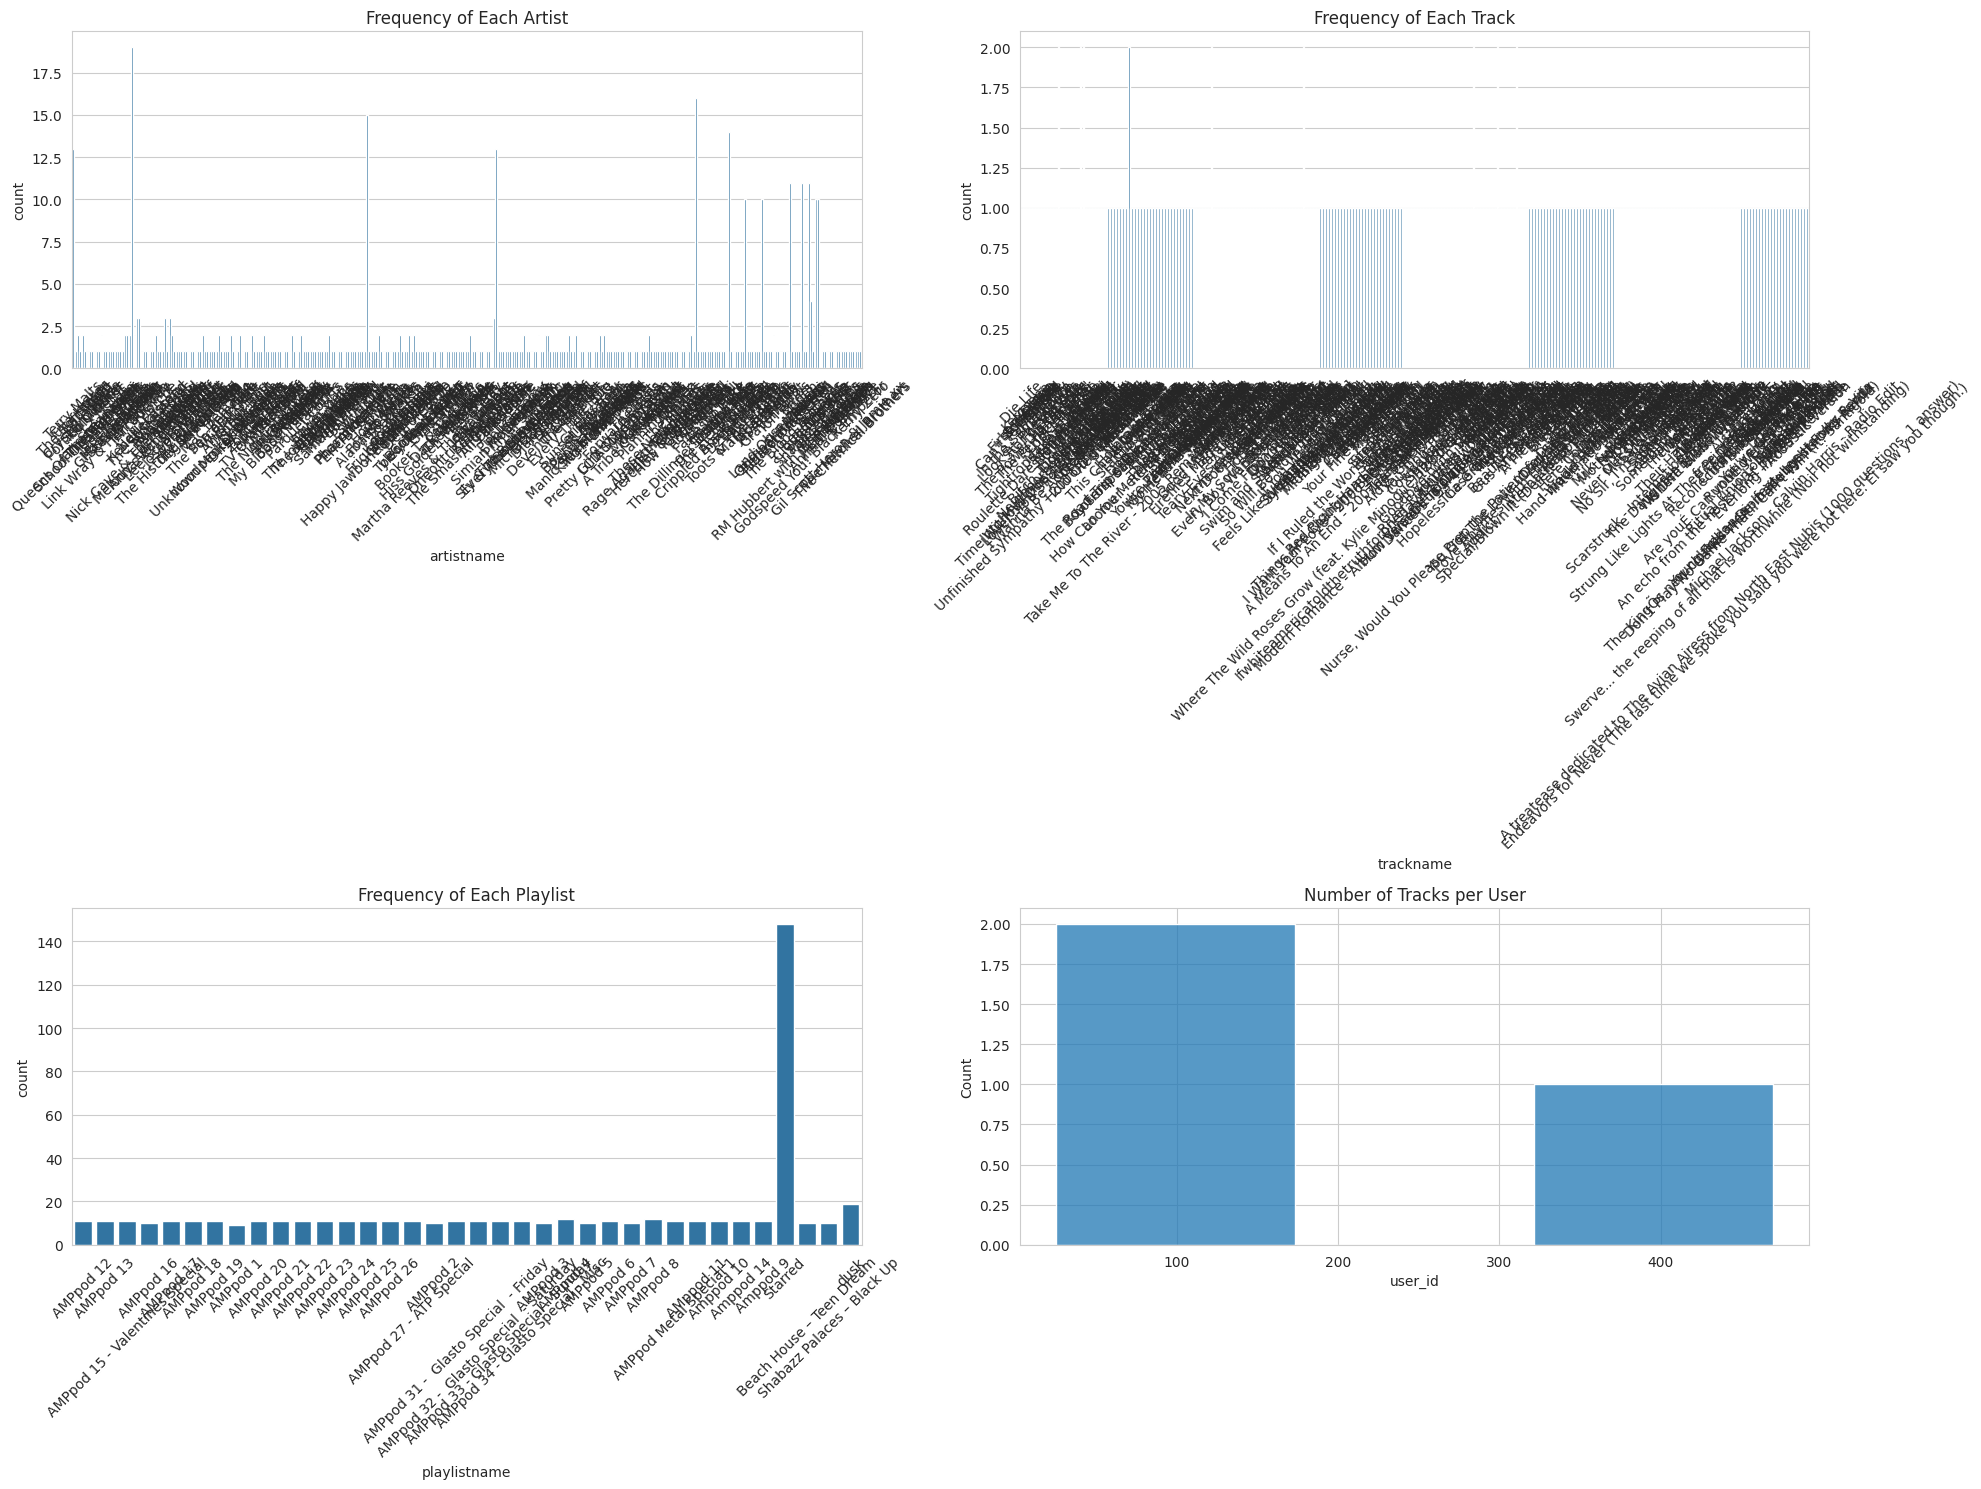

In [24]:
#TODO - UGLY !!!
#Visualization

def visualize_music_data(df):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))

    # Plot 1: Bar plot of the frequency of each artist
    sns.countplot(x='artistname', data=df, ax=axs[0, 0])
    axs[0, 0].set_title('Frequency of Each Artist')
    axs[0, 0].tick_params(axis='x', rotation=45)

    # Plot 2: Bar plot of the frequency of each track
    sns.countplot(x='trackname', data=df, ax=axs[0, 1])
    axs[0, 1].set_title('Frequency of Each Track')
    axs[0, 1].tick_params(axis='x', rotation=45)

    # Plot 3: Bar plot of the frequency of each playlist
    sns.countplot(x='playlistname', data=df, ax=axs[1, 0])
    axs[1, 0].set_title('Frequency of Each Playlist')
    axs[1, 0].tick_params(axis='x', rotation=45)

    # Plot 4: Histogram of the number of tracks per user
    sns.histplot(df['user_id'].value_counts(), ax=axs[1, 1])
    axs[1, 1].set_title('Number of Tracks per User')

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()


visualize_music_data(three_users_data_df)



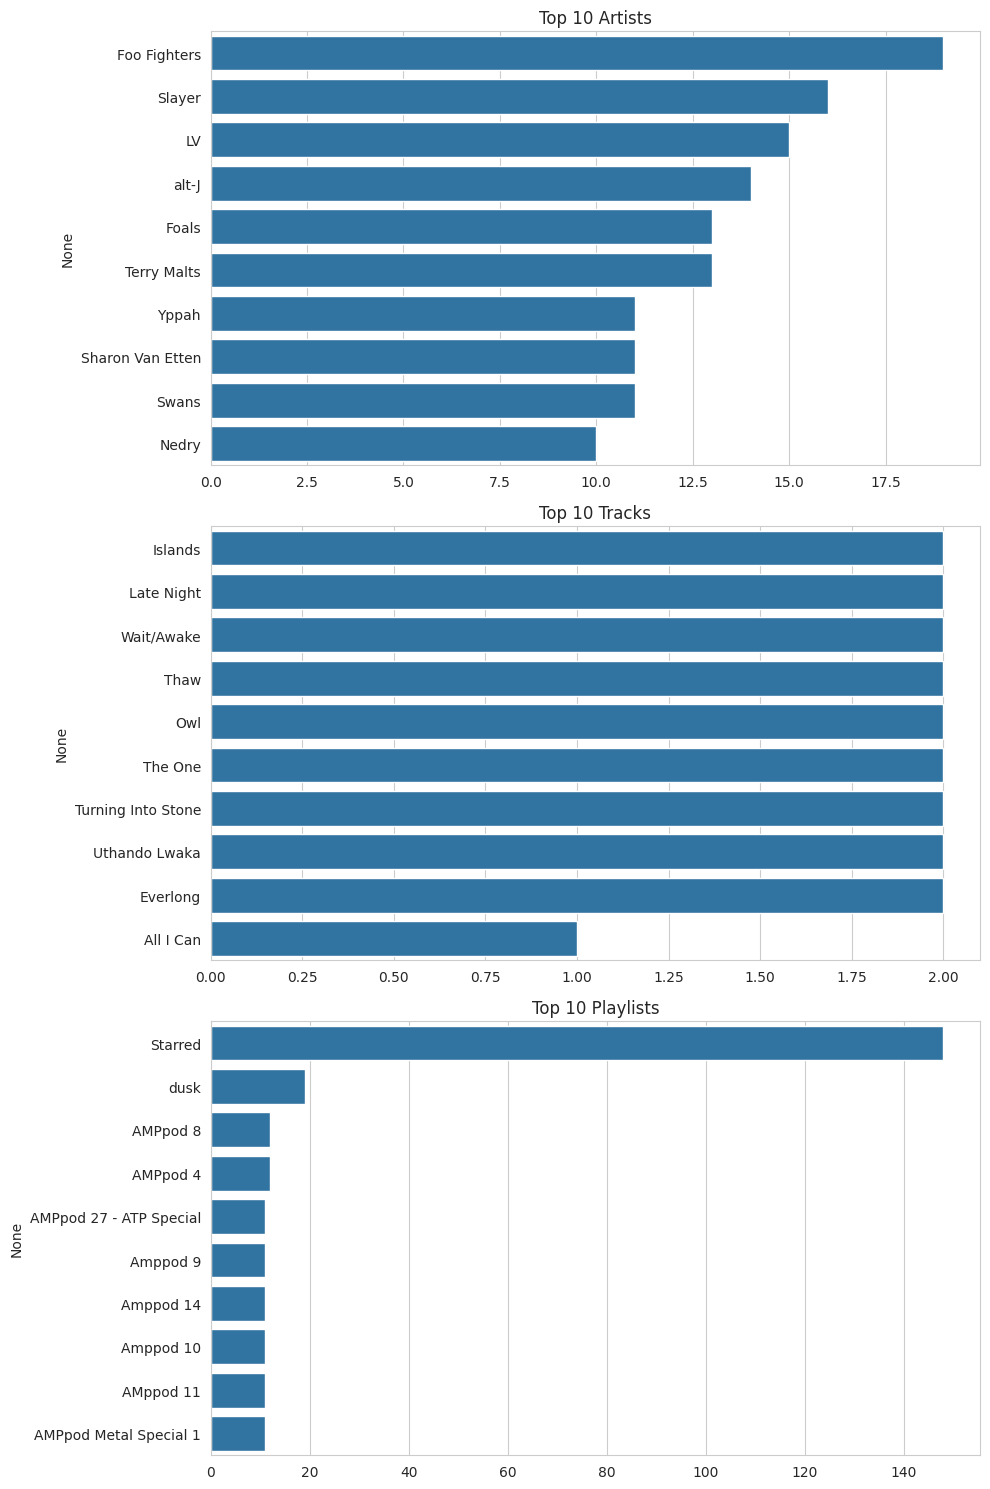

In [28]:

def visualize_music_data(df, top_n=10):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    # Plot 1: Bar plot of top N artists
    top_artists = df['artistname'].value_counts().head(top_n)
    sns.barplot(x=top_artists.values, y=top_artists.index, ax=axs[0])
    axs[0].set_title(f'Top {top_n} Artists')

    # Plot 2: Bar plot of top N tracks
    top_tracks = df['trackname'].value_counts().head(top_n)
    sns.barplot(x=top_tracks.values, y=top_tracks.index, ax=axs[1])
    axs[1].set_title(f'Top {top_n} Tracks')

    # Plot 3: Bar plot of top N playlists
    top_playlists = df['playlistname'].value_counts().head(top_n)
    sns.barplot(x=top_playlists.values, y=top_playlists.index, ax=axs[2])
    axs[2].set_title(f'Top {top_n} Playlists')

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

visualize_music_data(three_users_data_df)


In [26]:
#Missing Values
three_users_data_df.isnull().sum()

user_id         0
artistname      0
trackname       0
playlistname    0
dtype: int64

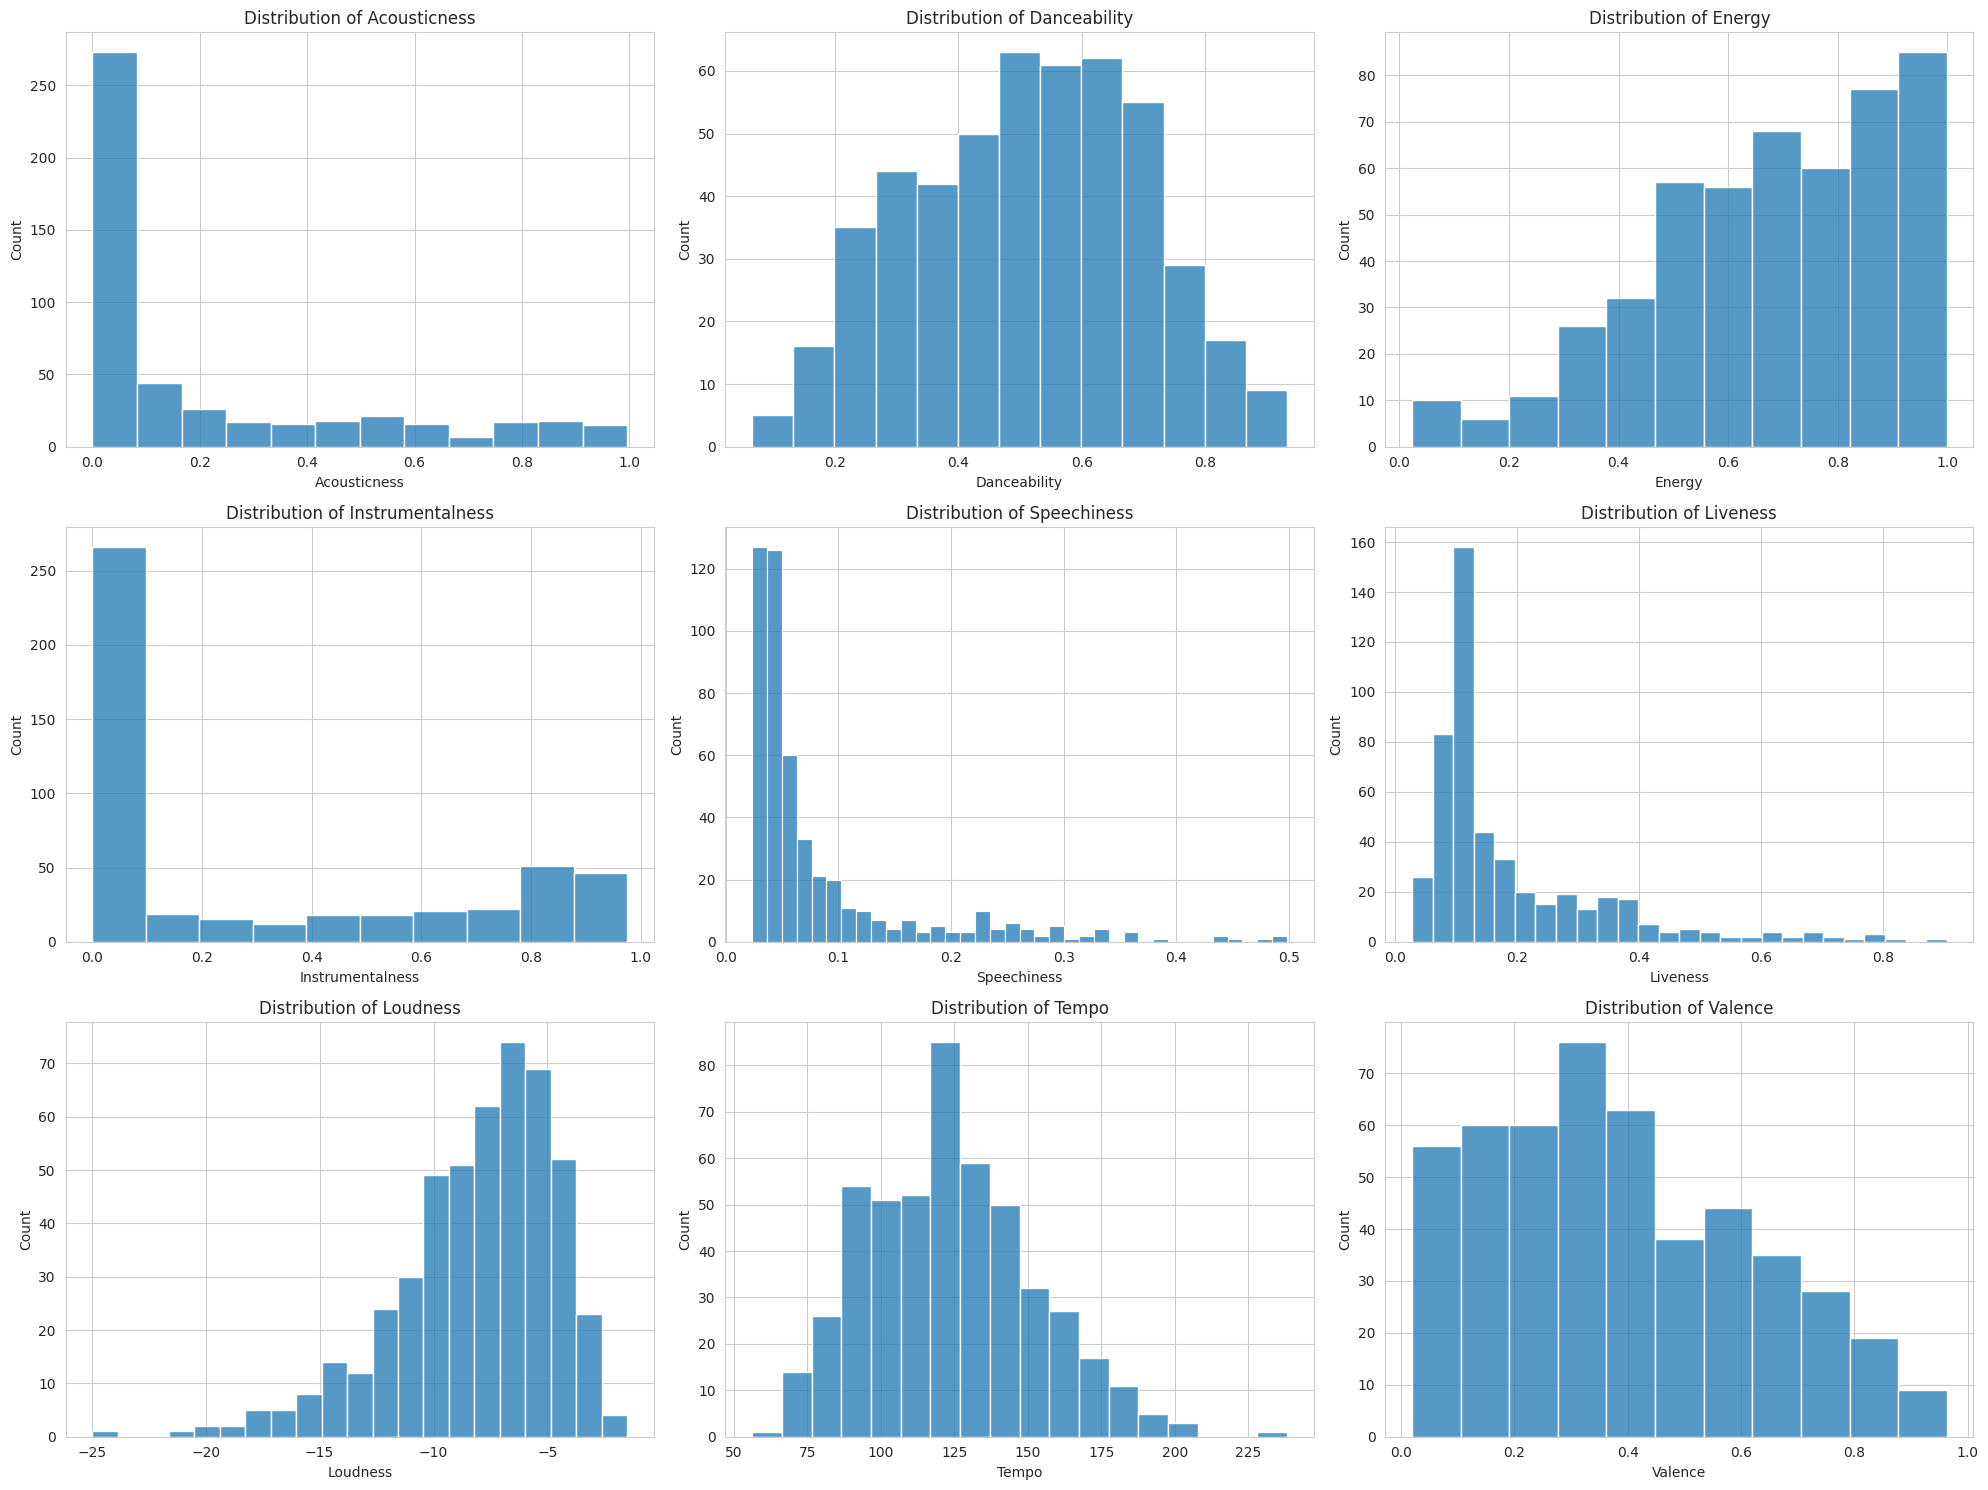

In [29]:
#Exploring the extended_tracks_metadata_for_3_users :

def visualize_song_features(df):
    sns.set_style("whitegrid")
    fig, axs = plt.subplots(3, 3, figsize=(20, 15))

    # Plot 1: Distribution of acousticness
    sns.histplot(df['Acousticness'], ax=axs[0, 0])
    axs[0, 0].set_title('Distribution of Acousticness')

    # Plot 2: Distribution of danceability
    sns.histplot(df['Danceability'], ax=axs[0, 1])
    axs[0, 1].set_title('Distribution of Danceability')

    # Plot 3: Distribution of energy
    sns.histplot(df['Energy'], ax=axs[0, 2])
    axs[0, 2].set_title('Distribution of Energy')

    # Plot 4: Distribution of instrumentalness
    sns.histplot(df['Instrumentalness'], ax=axs[1, 0])
    axs[1, 0].set_title('Distribution of Instrumentalness')

    # Plot 5: Distribution of speechiness
    sns.histplot(df['Speechiness'], ax=axs[1, 1])
    axs[1, 1].set_title('Distribution of Speechiness')

    # Plot 6: Distribution of liveness
    sns.histplot(df['Liveness'], ax=axs[1, 2])
    axs[1, 2].set_title('Distribution of Liveness')

    # Plot 7: Distribution of loudness
    sns.histplot(df['Loudness'], ax=axs[2, 0])
    axs[2, 0].set_title('Distribution of Loudness')

    # Plot 8: Distribution of tempo
    sns.histplot(df['Tempo'], ax=axs[2, 1])
    axs[2, 1].set_title('Distribution of Tempo')

    # Plot 9: Distribution of valence
    sns.histplot(df['Valence'], ax=axs[2, 2])
    axs[2, 2].set_title('Distribution of Valence')

    # Adjust the layout
    plt.tight_layout()

    # Show the plots
    plt.show()

# Assuming 'df' is your DataFrame containing the song features data
visualize_song_features(extended_tracks_metadata_for_3_users)


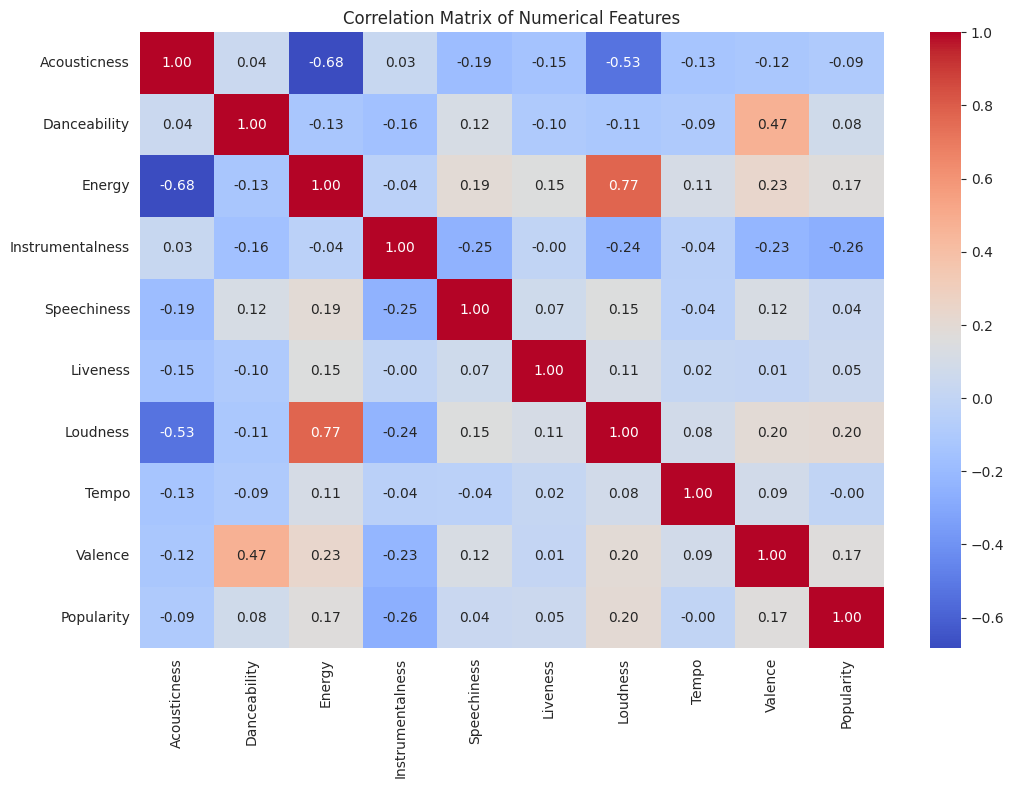

In [31]:
def plot_correlation_matrix(df):
   corr_matrix = df.corr()
   plt.figure(figsize=(12, 8))
   sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
   plt.title('Correlation Matrix of Numerical Features')
   plt.show()


plot_correlation_matrix(extended_tracks_metadata_for_3_users[['Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Speechiness', 'Liveness', 'Loudness', 'Tempo', 'Valence', 'Popularity']])


Number of unique genres: 293


<ipython-input-40-730c21cd0713>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
<ipython-input-40-730c21cd0713>:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


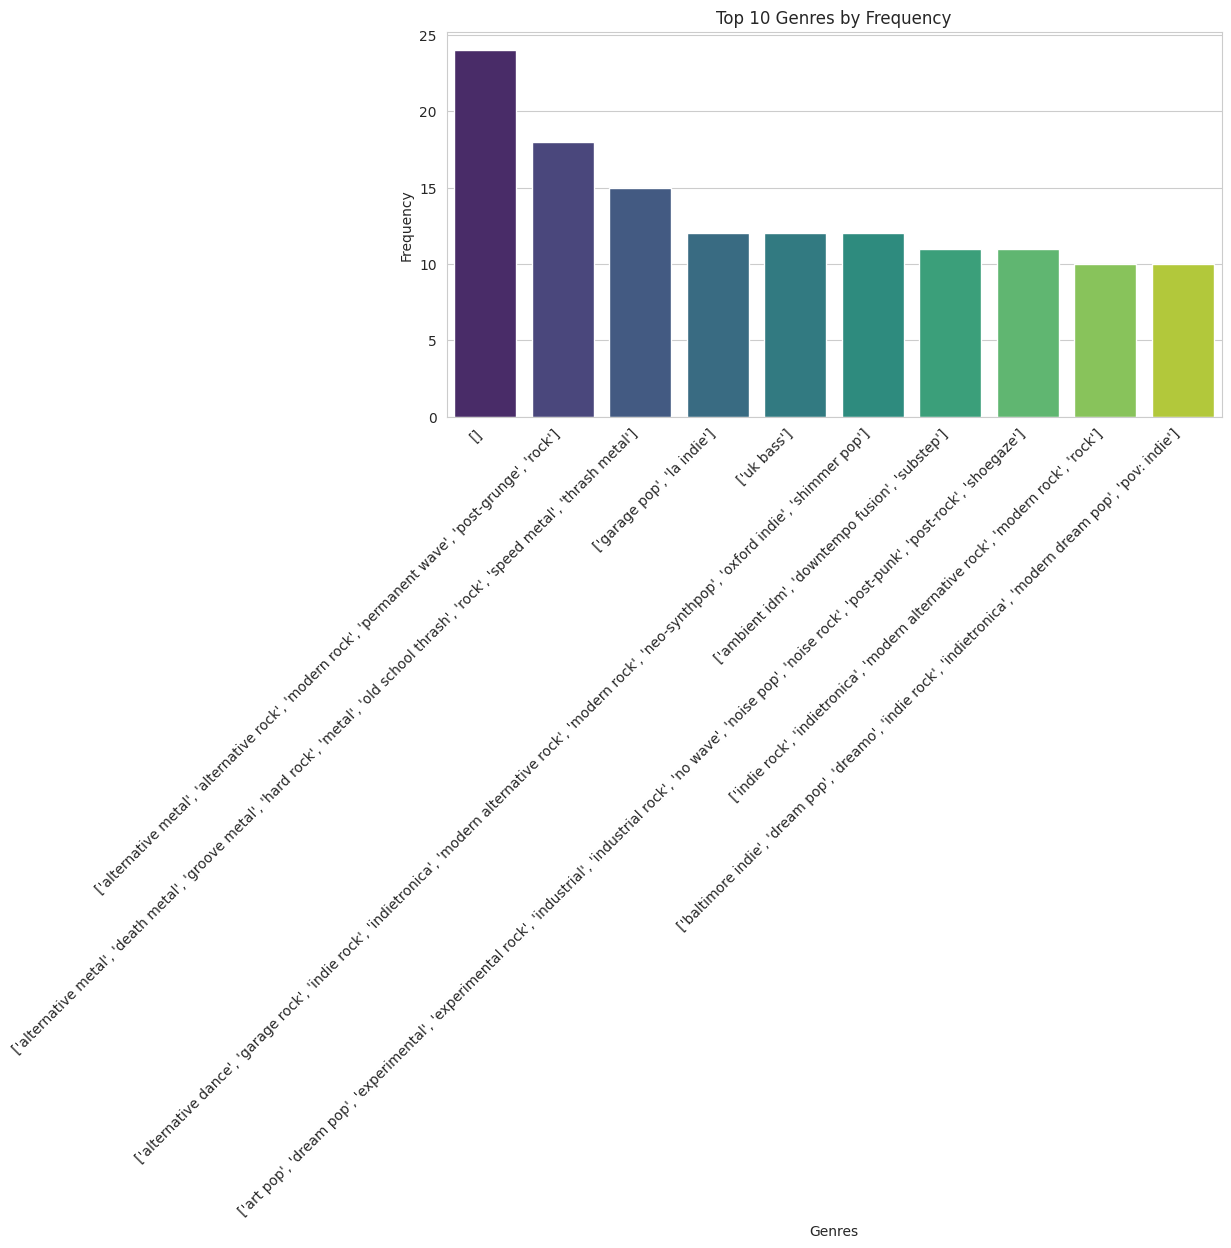

In [40]:

def plot_top_genre_frequency(df):
    genres = df['Genres'].explode().reset_index(drop=True)

    # Count the frequency of each genre
    genre_counts = genres.value_counts()

    # Show the number of unique genres
    unique_genres = genres.nunique()
    print(f'Number of unique genres: {unique_genres}')

    # Plot the top 10 genres by frequency
    top_genres = genre_counts.head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Genres')
    plt.ylabel('Frequency')
    plt.title('Top 10 Genres by Frequency')
    plt.tight_layout()
    plt.show()

plot_top_genre_frequency(extended_tracks_metadata_for_3_users)


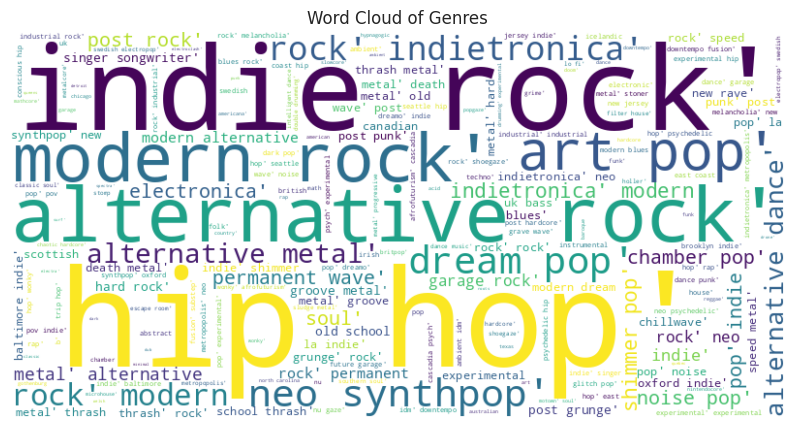

In [37]:
#Since 'Genre column has a lot of values, we will use 'Word Cloud' in order to display properly the frequency of the Genres.

def plot_genre_wordcloud(df):
    genres = df['Genres'].explode().dropna()

    # Combine all genres into a single string
    all_genres = ' '.join(genres)

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Genres')
    plt.show()

plot_genre_wordcloud(extended_tracks_metadata_for_3_users)


This function generates a word cloud showing the frequency of each genre in the dataset.<br>
The size of each genre in the word cloud represents its frequency, <br> so we can easily identify the most common genres. <br>
In the dataset, it seems like the most common genres are : Hip hop, Indie rock, modern rock, alternative rock , and dream pop .